# Predicting Air Quality

**Dataset**: Air Quality dataset from UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Air+Quality) </br>
**Project idea**: Build a model to predict Temperature based on various features such as humidity, CO levels, etc.</br>

**Abstract**: Contains the responses of a gas multisensor device deployed on the field in an Italian city. Hourly responses averages are recorded along with gas concentrations references from a certified analyzer.



**Data Set Information:**

The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. Missing values are tagged with -200 value.
This dataset can be used exclusively for research purposes. Commercial purposes are fully excluded.

Attribute Information:</br>

0 Date (DD/MM/YYYY)</br>
1 Time (HH.MM.SS)</br>
2 True hourly averaged concentration CO in mg/m^3 (reference analyzer)</br>
3 PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)</br>
4 True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)</br>
5 True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)</br>
6 PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)</br>
7 True hourly averaged NOx concentration in ppb (reference analyzer)</br>
8 PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)</br>
9 True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)</br>
10 PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)</br>
11 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)</br>
12 Temperature in Â°C-**This is the Target Variable**</br>
13 Relative Humidity (%)</br>
14 AH Absolute Humidity</br>

In [151]:
# import necessary libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import time
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [2]:
# read the dataset into python environment
data=pd.read_excel("AirQualityUCI.xlsx")

# 1. Data Inspection

In [3]:
# first 3 rows of the dataset
data.head(3)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.6,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.3,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.9,53.975000,0.750239


In [4]:
# last 3 rows of the dataset
data.tail(3)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550,0.513866
9356,2005-04-04,14:00:00,2.2,1070.75,-200,11.932060,1047.25,265.2,654.00,167.7,1128.50,816.00,28.500,13.125,0.502804


In [5]:
# size of the dataset
data.shape

(9357, 15)

Tha data given contains 9357 rows and 15 columns

In [6]:
# statistics summary of the data
data.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


by describe() method we can analyse  distribution of the data, as well as the scale of the features.
comparing the mean & 50% quartile value, we can conclude that there are some outlier in the dataset and some features are normally distributed.

In [7]:
# null values in the data
data.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

There is no null values in the dataset

In [8]:
# data types of features in the dataset
data.dtypes

Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                  int64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
dtype: object

Time is in object format, we should change it to time format during Data cleaning.

In [9]:
# Feature names 
data.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [10]:
# total no of elements
data.size

140355

# 2. Exploratory Data Analysis (EDA)

					 Distribution of numerical Features


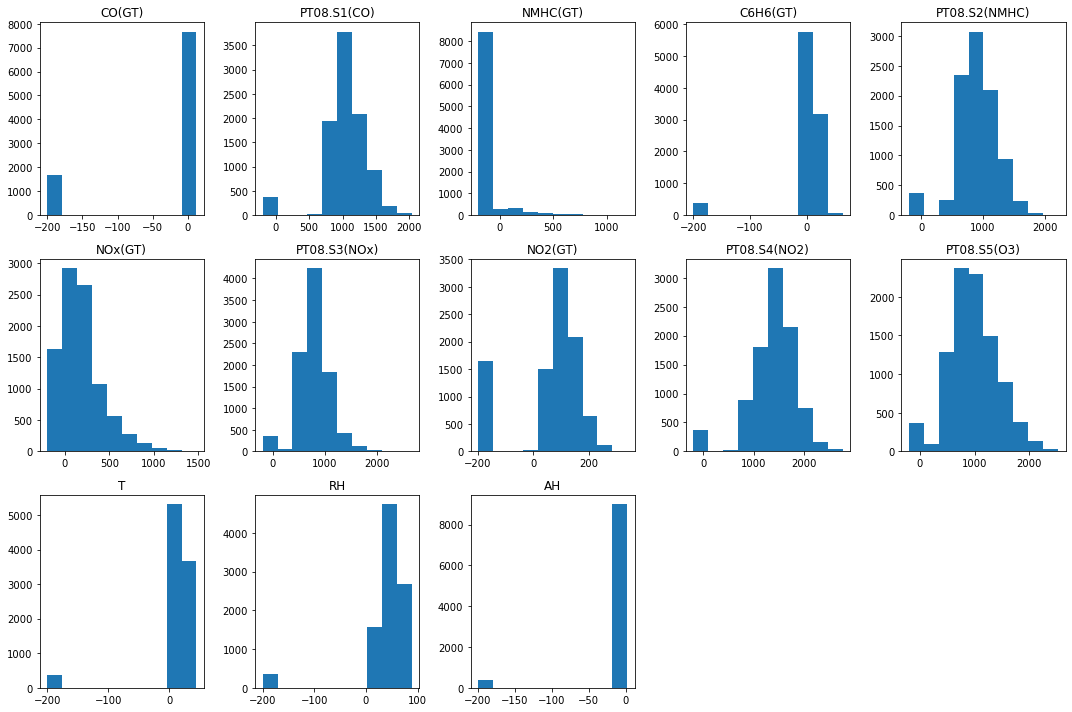

In [11]:
# Distribution of numerical features
cols=['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH']

plt.figure(figsize=(15,10))

# use enuemrate funetion to make use of values and its index
for ind, col in enumerate(cols,1):
    plt.subplot(3,5,ind)
    plt.hist(data[col])
    plt.title(col)
    plt.yticks()
    plt.tight_layout()
 
print("\t\t\t\t\t Distribution of numerical Features")

Insights:</br>
    1. most of the numerical features are skewed</br>
    2. there are some outliers present in the features</br>

					 Correlation between numerical Features


<Figure size 1800x720 with 0 Axes>

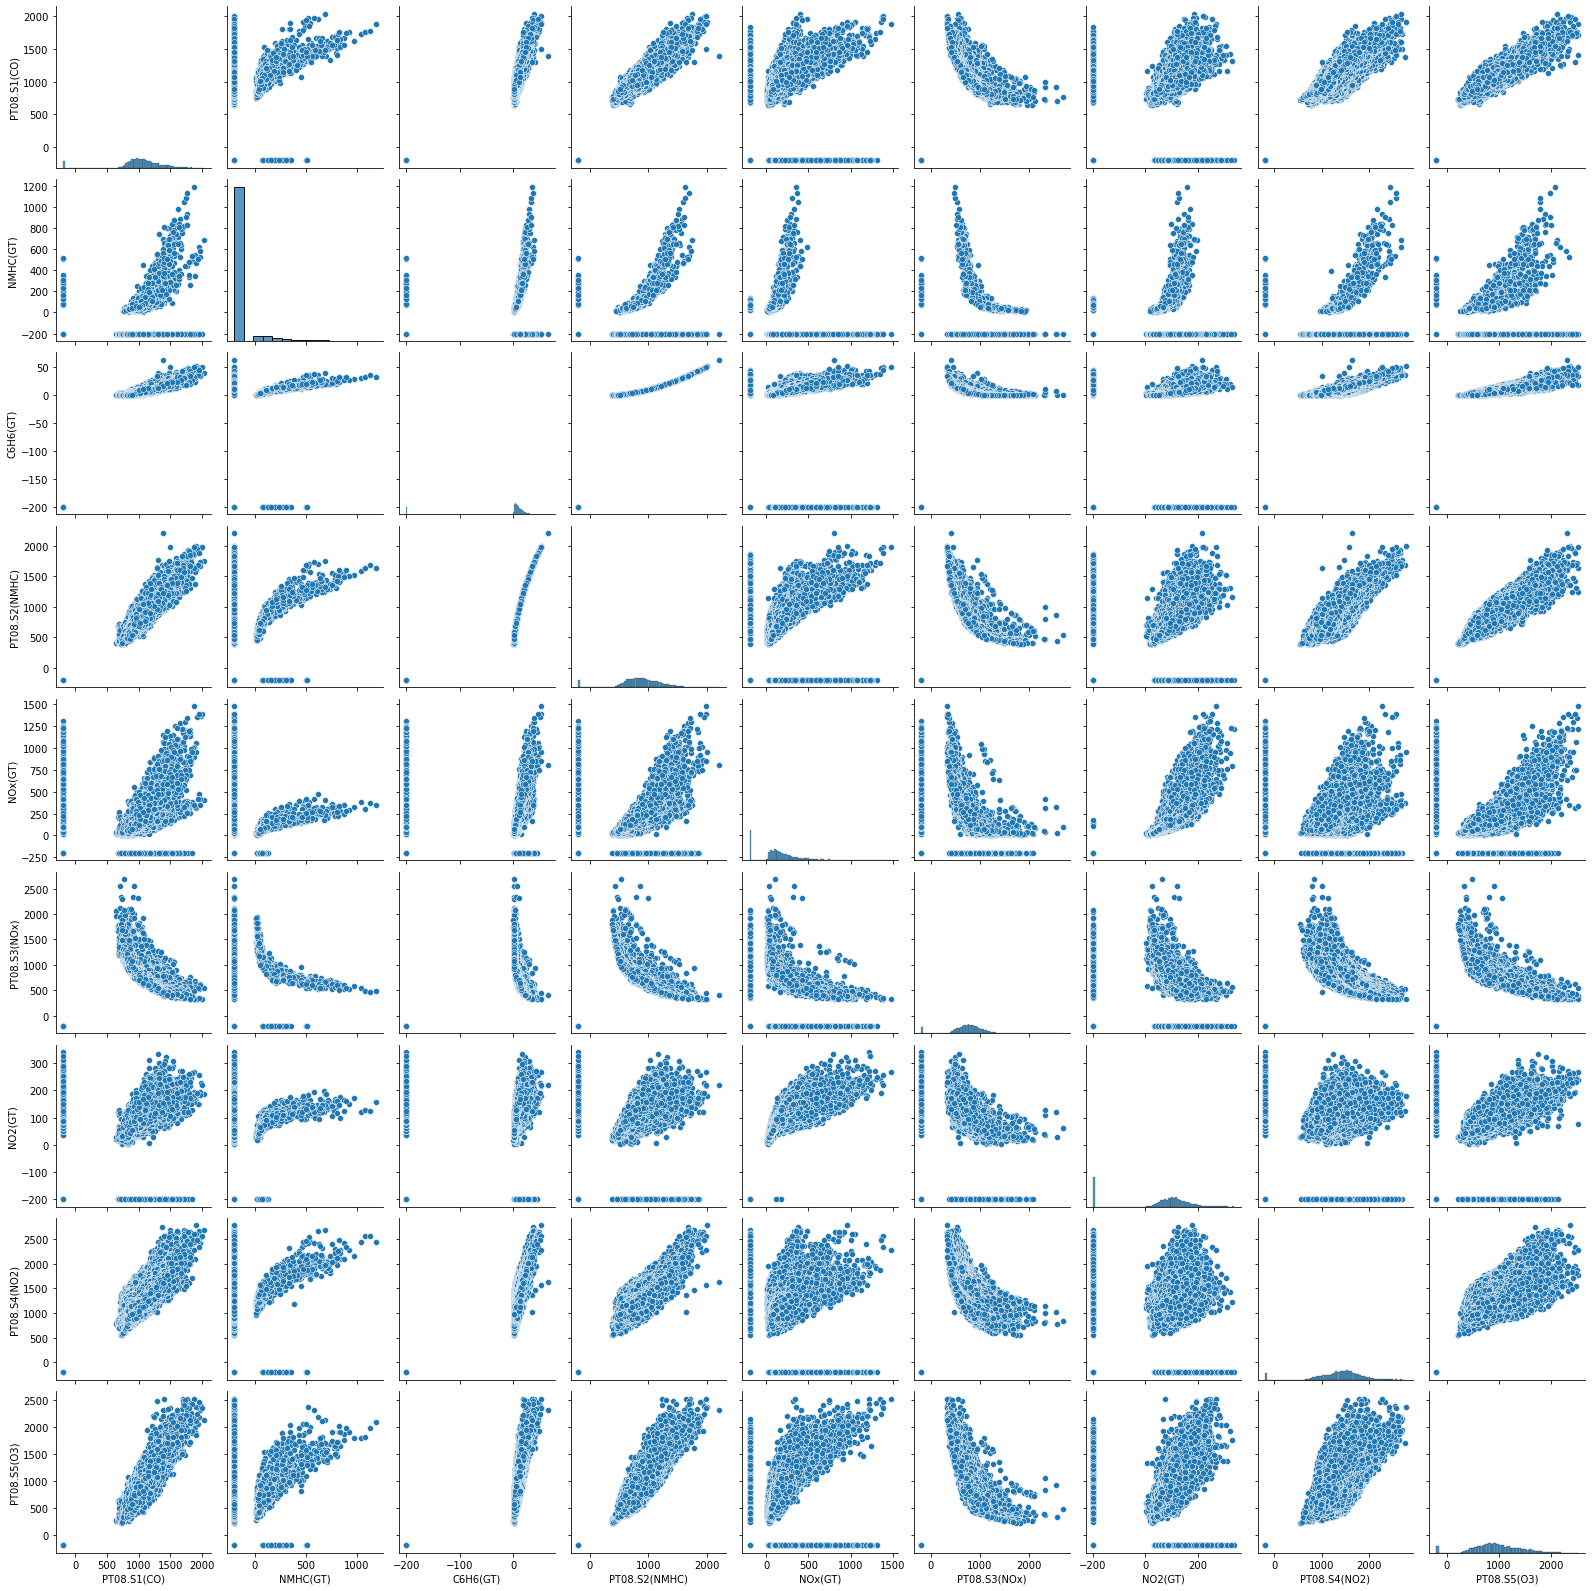

In [12]:
# pairplot for visualising the correlation between numerical features
cols=['PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)']

plt.figure(figsize=(25,10))
sns.pairplot(data[cols])

print("\t\t\t\t\t Correlation between numerical Features")

Insight:</br>
    1. there are strong positive and negative correlation between features</br>
    2. need to handle the highly correlated features during feature reduction</br>

In [13]:
#creating a new column contain month & year information
data['Month_Year']=data['Date'].dt.strftime('%Y-%b')

# creating new column for weekend , 1 means its weekend
# strftime("%w") will return day no. Monday=0, Sunday=6
data["Weekend"]=data["Date"].dt.strftime("%w")

# formatting the week day into Integer values
data["Weekend"]=data["Weekend"].astype('int64')

# ca;cuating whether it is a weekend  or not
data['Weekend']=data["Weekend"].apply(lambda x: 1 if(x >4) else 0)

data['Weekend']=data['Weekend'].astype(int)

In [14]:
data.head(3)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Month_Year,Weekend
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.6,48.875001,0.757754,2004-Mar,0
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.3,47.700000,0.725487,2004-Mar,0
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.9,53.975000,0.750239,2004-Mar,0


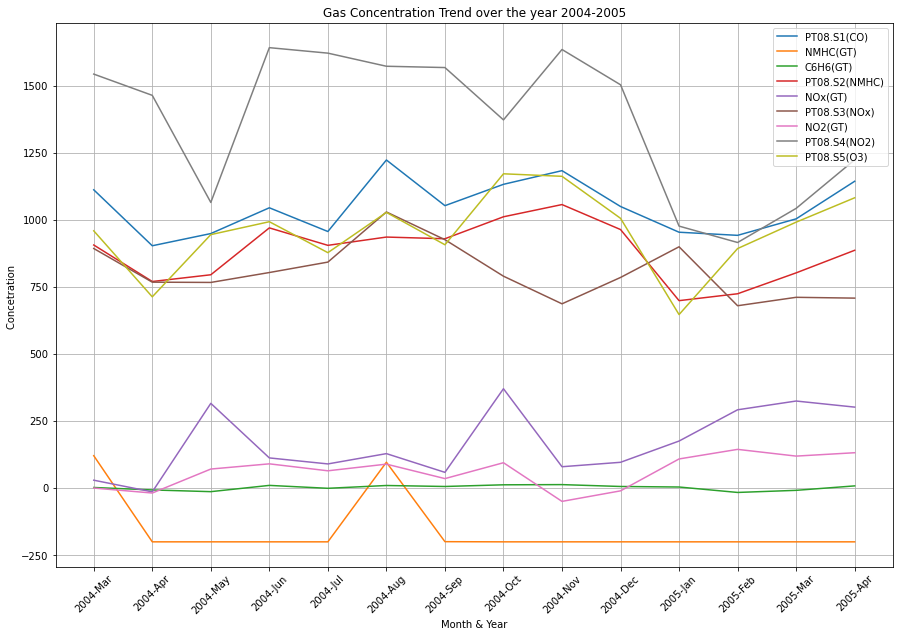

In [15]:
# Gas concentartion trend over months

cols=['Month_Year','PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)']

# unique values of Month_Year
time_ref=data["Month_Year"].unique()
ref=data[cols].groupby("Month_Year",as_index=False).agg(np.average)

cols=['PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)']

#data[cols].groupby("Month_Year").(np.mean())

plt.figure(figsize=(15,10))
plt.title('Gas Concentration Trend over the year 2004-2005')

#plot the line graph of each columns
for col in cols:
    # line plot of each columns
    plt.plot(time_ref ,ref[col],label =col)
    plt.xticks(rotation=45)
    plt.grid(True)

plt.xlabel("Month & Year")
plt.ylabel("Concetration ")
plt.legend()
plt.show()


Note:</br>
    
    1.  PT08.S1(CO)-tin oxide is marked high in Aug-2004 and a drastic increase observed from 2004 to 2005 
    2.  NMHC(GT)-Non Metanic HydroCarbons is also marked hign in March & Aug 2004, it was observed same level
        for the rest of month 
    3.  C6H6(GT)-Benzene is reported hign for the month of Oct & Nov 2004, can observe significant decrease in Feb 2005
    4.  PT08.S2(NMHC)-titanium is also reported high in the month of Nov 2004, and was found low in Jan & Feb 2005
    5.  NOx(GT)-Nitrogen oxide drastically increased from 2004 to 2005
    6.  PT08.S3(NOx)-Tungsten oxide observed low in Feb 2005
    7.  NO2(GT)-Nitrogen dioxide drastically increased from 2004 to 2005, but observed low in Nov 2004
    8.  PT08.S5(O3)-indium oxide observed low in Jan 2005

In [16]:
#create new colum for Hour
data["Hour"]=data["Time"].apply(lambda x: x.hour)

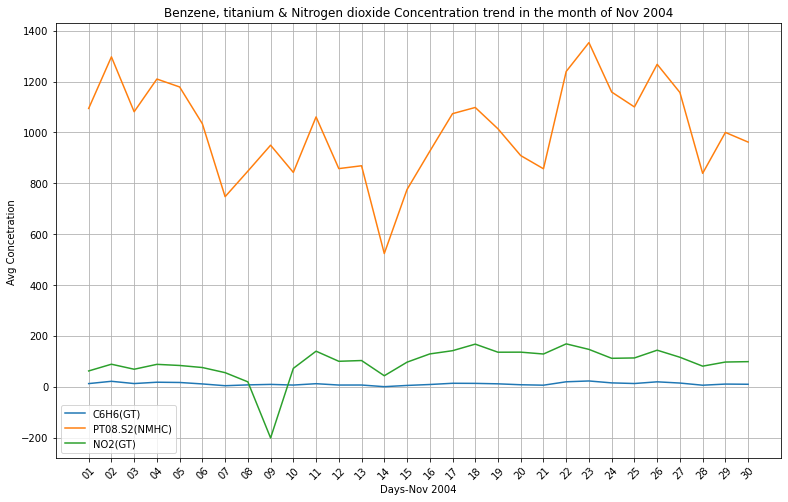

In [17]:
# concentration of benzene, titanium & Nitrogen dioxide in the month of Nov 2004
cols=['C6H6(GT)','PT08.S2(NMHC)', 'NO2(GT)']

# set the figure size and title
plt.figure(figsize=(13,8))
plt.title('Benzene, titanium & Nitrogen dioxide Concentration trend in the month of Nov 2004')

# creating a new dataframe for Nov 2004 
ref2=data.loc[data['Month_Year']=='2004-Nov']

# creating a new column for Day
ref2['days']=data['Date'].dt.strftime('%d')

# calculating average amount per day
ref2=ref2.groupby("days",as_index=False).agg(np.average)

# plot the line graph of each columns
for col in cols:
    # line plot of each columns
    plt.plot(ref2["days"] ,ref2[col] ,label =col)
    plt.xticks(rotation=45)
    plt.grid(True)
    
plt.xlabel("Days-Nov 2004")
plt.ylabel("Avg Concetration ")
plt.legend()
plt.show()


Note: </br>
    1. titanium concentration observed low on 14th Nov 2004, It was a weekend</br>
    2. Nitrogen dioxide concentration was also found low in 09 th Nov 2004</br>
    3. titanium & benzezne marked hign on 22nd & 23rd Nov 2004

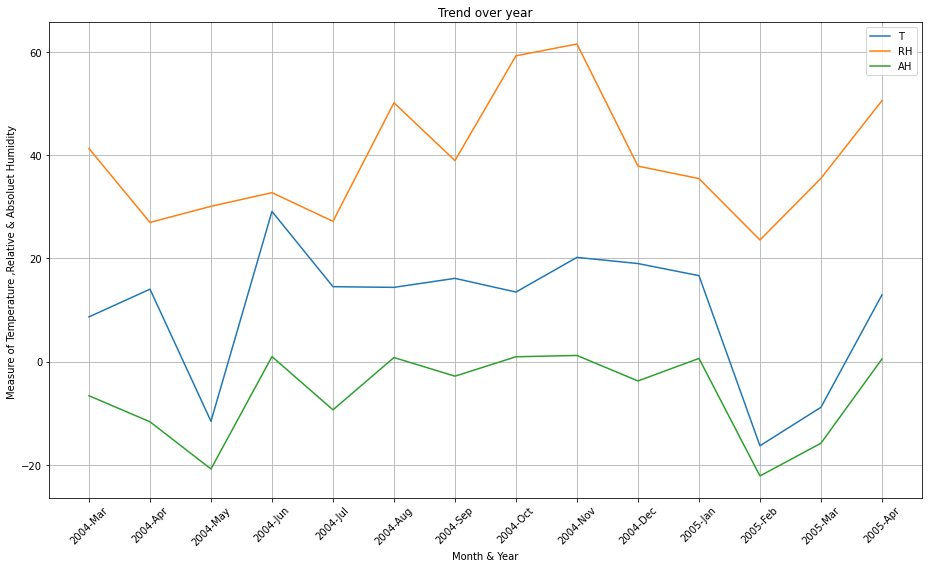

In [18]:
cols=['Month_Year','T','RH','AH']

time_ref=data["Month_Year"].unique()
ref=data[cols].groupby("Month_Year",as_index=False).agg(np.average)

cols=['T','RH','AH']

plt.figure(figsize=(13,8))
plt.title('Trend over year')

#plot the line graph of each columns
for col in cols:
    # line plot of each columns
    plt.plot(time_ref ,ref[col],label =col)
    plt.xticks(rotation=45)
    plt.grid(True)
    
plt.xlabel("Month & Year")
plt.ylabel("Measure of Temperature ,Relative & Absoluet Humidity ")
plt.tight_layout()    
plt.legend()
plt.show()


Note: </br>
    1. High temperature reported in June 2004, during this month tungsten oxide concentration was recorded high</br>
    2. we can see that relative humidity is lower when the temperature is high</br>
    3. Compared to 2004, temperature & Humdity was reported low in March 2005

Text(0.5, 1.0, 'Correlation between Features')

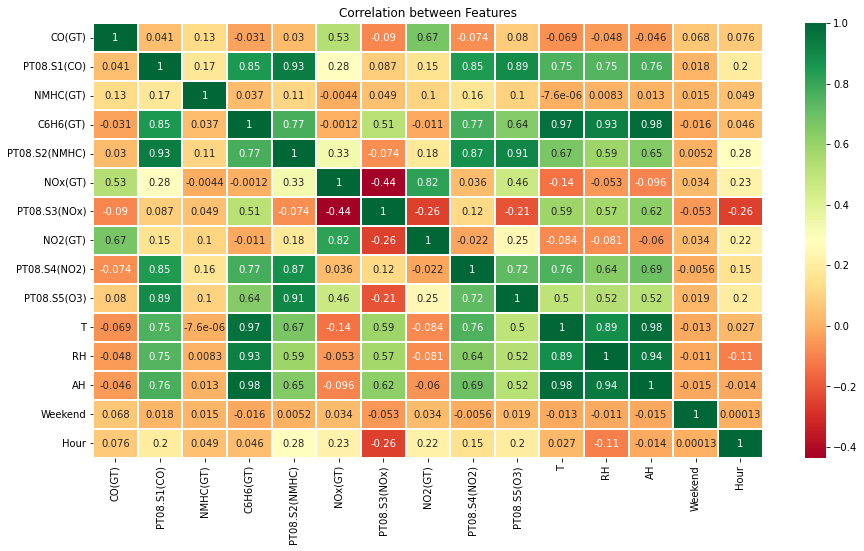

In [19]:
# correllation between Features

plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
plt.title("Correlation between Features")

Note: </br>
    1. High +ve correlation observed between Benzene , temperature & Humidity</br>
    2. Tin Oxide & Titanium also have high +ve correlation</br>

Text(0.5, 1.0, 'Tin Oxide vs Titanium')

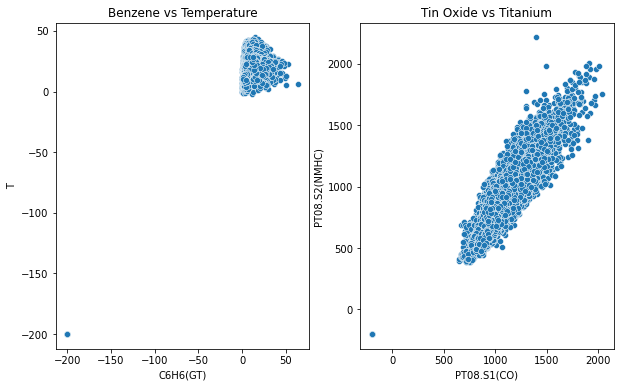

In [20]:
# correlation between bezene & Temperature
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.scatterplot(data["C6H6(GT)"],data['T'])
plt.title("Benzene vs Temperature")

plt.subplot(1,2,2)
sns.scatterplot(data["PT08.S1(CO)"],data['PT08.S2(NMHC)'])
plt.title("Tin Oxide vs Titanium")

Note:</br>
    1. We can observe a linear relation between Tin oxide and Titanium</br>
    2. we can see, a very low value in benzene concentration

# 2. Data Cleaning

**<u>a. Handling of Missing Value</u>**

In [21]:
# Missing values
data.isna().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
Month_Year       0
Weekend          0
Hour             0
dtype: int64

No Missing values present in the data

**<u>b. re-index the columns</u>**

In [22]:
# Move the target variable to the last

data=data.reindex(columns = [col for col in data.columns if col != 'T'] + ['T'])

**<u>c. Handling of outliers</u>**

In [23]:
cols=['PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)']
#create an empty dictoinary
negative_Val={}

for i in cols:
    # take the index of each column having negative values
    negative_Val[i]=data.loc[data[i]<0,:].index

print(negative_Val)

{'PT08.S1(CO)': Int64Index([ 524,  525,  526,  701,  702,  703,  704,  705,  706,  707,
            ...
            8106, 8107, 8108, 8109, 8110, 8111, 8112, 8113, 8114, 8777],
           dtype='int64', length=366), 'NMHC(GT)': Int64Index([  39,  184,  185,  186,  187,  188,  189,  190,  191,  192,
            ...
            9347, 9348, 9349, 9350, 9351, 9352, 9353, 9354, 9355, 9356],
           dtype='int64', length=8443), 'C6H6(GT)': Int64Index([ 524,  525,  526,  701,  702,  703,  704,  705,  706,  707,
            ...
            8106, 8107, 8108, 8109, 8110, 8111, 8112, 8113, 8114, 8777],
           dtype='int64', length=366), 'PT08.S2(NMHC)': Int64Index([ 524,  525,  526,  701,  702,  703,  704,  705,  706,  707,
            ...
            8106, 8107, 8108, 8109, 8110, 8111, 8112, 8113, 8114, 8777],
           dtype='int64', length=366), 'NOx(GT)': Int64Index([   9,   33,   39,   57,   81,  105,  129,  153,  177,  201,
            ...
            8553, 8577, 8601, 8625, 8649, 8

Note: There are a large no of -ve values in the data set.

**Outlier handling using IQR Technique**</br>
</br>
In this techniques involves replacing extreme values with a predetermined threshold. Specifically, values above a certain percentile are replaced with upper threshold, and values below a certain percentile are replaced with the lower threshold value.

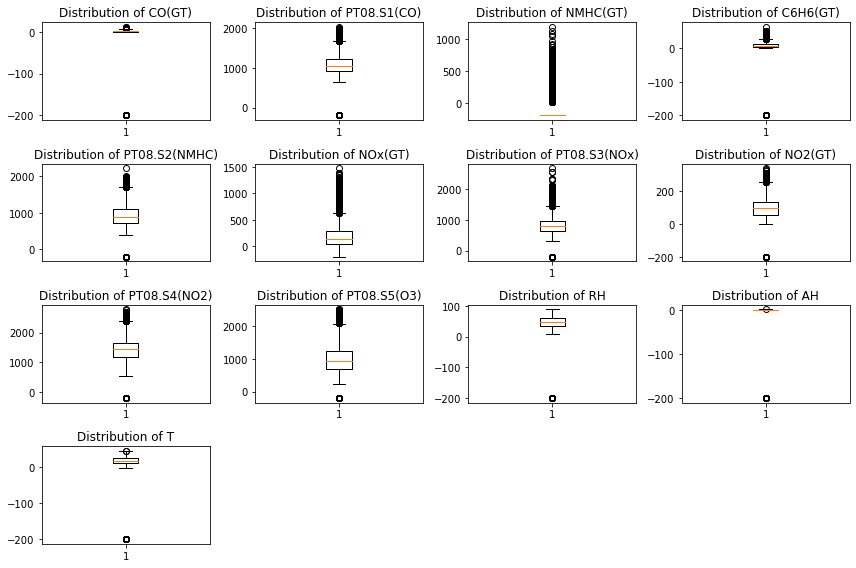

In [24]:
# before Before applying IQR techniques
data1=data.copy()
sliced_data=['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)','RH', 'AH','T']
plt.figure(figsize=(12,8))

for count,name in enumerate(sliced_data):
    # devide the plot are into 16 subplots
    plt.subplot(4,4,count+1)
    # plot the boxplot for each column
    plt.boxplot(data[name]) 
    plt.title("Distribution of "+ name)
    plt.tight_layout() 


Note: We can see that there are negative valies in the dependent & independent features. 
so we will remove those extreme values with a theshold values.

In [25]:
num_col=['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)','RH', 'AH','T']

# create a for loop to convert the outlier value to a pertical value, using Inter quartile method
# by using this method, we are calculating  upper and lower limit values to be replaced with outliers 

for i in num_col:
    # calculating 25th percentile
    Q1=np.percentile(data[i],25,interpolation='midpoint')
    
    # calculating 75th percentile
    Q3=np.percentile(data[i],75,interpolation='midpoint')
    
    # calculating inter quartile range
    IQR=Q3-Q1
    
    # set the upper limit
    UP=Q3+(1.5* IQR)
    
    # set the lower limit
    LP=Q1-(1.5* IQR)
    
    # replacing the outlier values in the dataset
    data.loc[data[i]>UP,i]=UP
    data.loc[data[i]<LP,i]=LP


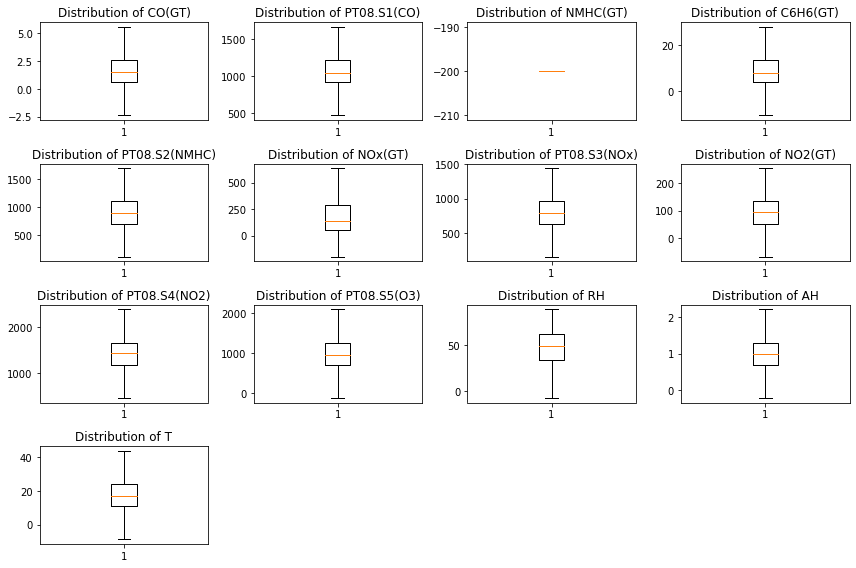

In [26]:
# verify whether the outliers are removed from the dataset or not 
sliced_data=['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)','RH', 'AH','T']
plt.figure(figsize=(12,8))

for count,name in enumerate(sliced_data):
    # devide the plot are into 16 subplots
    plt.subplot(4,4,count+1)
    # plot the boxplot for each column
    plt.boxplot(data[name]) 
    plt.title("Distribution of "+ name)
    plt.tight_layout() 


Note: outliers has been removed from the dataset

**<u>d. removal of duplicated rows</u>**

In [34]:
# Selecting duplicate rows except first
# occurrence based on all columns
data[data.duplicated()]

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),RH,AH,Month_Year,Weekend,Hour,T


No duplicate rows in the dataset

# 3. Encoding of Categorical columns

Encoding is not required for this dataset, since all the features are of numerical type.

# 4. Feature Engineering

In [47]:
# creating new columns for month & year
data["Year"]=data["Date"].dt.year
data["Month"]=data["Date"].dt.month

# 5. Feature Selection

In [50]:
# removing columns date, time & month & year from the dataset
data=data.drop(["Date","Time","Month_Year"], axis=1)

In [55]:
# column info 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   float64
 2   NMHC(GT)       9357 non-null   int64  
 3   C6H6(GT)       9357 non-null   float64
 4   PT08.S2(NMHC)  9357 non-null   float64
 5   NOx(GT)        9357 non-null   float64
 6   PT08.S3(NOx)   9357 non-null   float64
 7   NO2(GT)        9357 non-null   float64
 8   PT08.S4(NO2)   9357 non-null   float64
 9   PT08.S5(O3)    9357 non-null   float64
 10  RH             9357 non-null   float64
 11  AH             9357 non-null   float64
 12  Weekend        9357 non-null   int32  
 13  Hour           9357 non-null   int64  
 14  T              9357 non-null   float64
 15  Year           9357 non-null   int64  
 16  Month          9357 non-null   int64  
dtypes: float64(12), int32(1), int64(4)
memory usage: 1.2

**a. Feature selection using Lasso regularization**

In [52]:
# copy the data set to another variable
data2=data.copy()

# split the data into dependent & independent features
y = data2["T"]
X = data2.drop("T", axis=1) 

# Fit Lasso model and select features
lasso = Lasso(alpha=0.1)
# fit the values x & y
lasso.fit(X, y)
# selecting those features having lasso coefficient >0 & [0]is used to select the values at 0 position from the array
selected_features = np.where(lasso.coef_ != 0)[0]

# Print the selected features
print("Selected features: ", selected_features)

Selected features:  [ 0  1  3  4  5  6  7  8  9 10 11 13 14 15]


This method involves adding a L1 penalty term to the objective function of the model to encourage sparsity.
The penalty term eliminates the features that have little or no effect on the target variable, and the remaining features are selected.

From the Lasso regularisation method its clear that columns NMHC(GT),Weekend & Month have less impact on Target variable.

**b. Feature Selection using Tree based alogorithms**

In [69]:
data2=data.copy()
# split the data into dependent & independent features
y = data2["T"]
X = data2.drop("T", axis=1) 

# split the data into train & test set
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

# check the shape of the train & test set
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7485, 16)
(1872, 16)
(7485,)
(1872,)


In [72]:
# create amodel object
rf=RandomForestRegressor()
# fit the values to the model
rf.fit(x_train,y_train)
# find the feature importance of each column
feature_imp=pd.Series(rf.feature_importances_,index=X.columns).sort_values(ascending=False)*100
feature_imp

AH               50.536798
RH               33.376464
PT08.S4(NO2)     15.280694
Month             0.621212
PT08.S5(O3)       0.032105
PT08.S3(NOx)      0.026156
PT08.S1(CO)       0.025002
Hour              0.018319
C6H6(GT)          0.017989
NOx(GT)           0.016461
PT08.S2(NMHC)     0.016358
NO2(GT)           0.012102
Year              0.009116
CO(GT)            0.008951
Weekend           0.002270
NMHC(GT)          0.000000
dtype: float64

Note: NMHC(GT),Weekend & CO(GT) are the columns with Low feature importance value as per this method

In [75]:
# by considering above 2 method, drop NMHC(GT) & Weekend from the dataset

data=data.drop(["NMHC(GT)","Weekend"],axis=1)

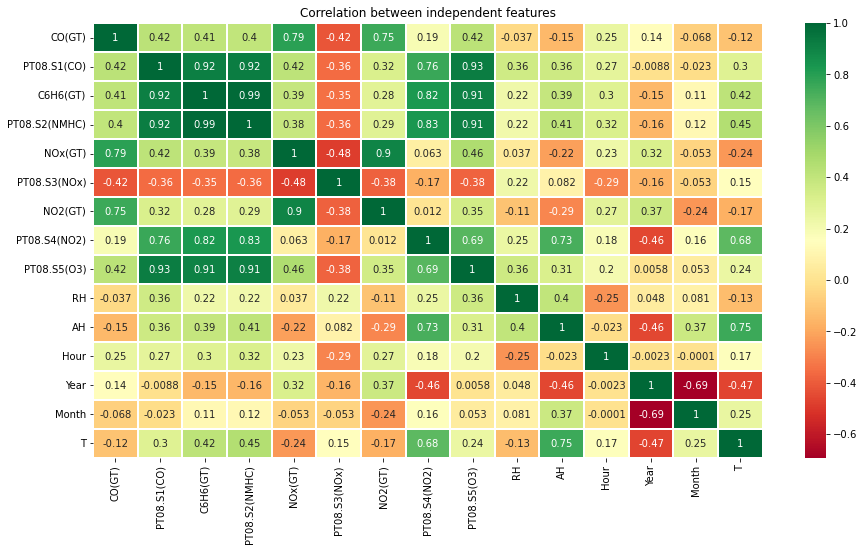

In [83]:
# check for the correlation between independent features

cols=['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
       'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'RH', 'AH',
       'Hour', 'Year', 'Month','T']
plt.figure(figsize=(15,8))
plt.title("Correlation between independent features")
sns.heatmap(data[cols].corr(),linewidths=0.2,annot=True,cmap="RdYlGn")
plt.show()

Note:</br>
    1. 'C6H6(GT)' & 'PT08.S2(NMHC)' are highly correlated, we can choose the one having more correlation to the target  variable.</br>
    2. Hence we can drop C6H6(GT) from the dataset

In [85]:
# drop the column C6H6(GT) from the dataset
data=data.drop(["C6H6(GT)"],axis=1)

In [88]:
# Re-indexing the dataset
data=data.reindex(columns=[col for col in data.columns if col !="T"]+["T"])
data.head(3)

,CO(GT),PT08.S1(CO),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),RH,AH,Hour,Year,Month,T
0,2.6,1360.00,1045.50,166.0,1056.25,113.0,1692.00,1267.50,48.875001,0.757754,18,2004,3,13.6
1,2.0,1292.25,954.75,103.0,1173.75,92.0,1558.75,972.25,47.700000,0.725487,19,2004,3,13.3
2,2.2,1402.00,939.25,131.0,1140.00,114.0,1554.50,1074.00,53.975000,0.750239,20,2004,3,11.9


# 6. Modeling

***6a.Modeling without standisation***

In [113]:
# seperate the data into predictor & response variable
y = data2["T"]
X = data2.drop("T", axis=1) 

# split the data into train & test set
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

# creating instance for each model
lr=LinearRegression()
dc=DecisionTreeRegressor()
rf=RandomForestRegressor()

#copying these instance to an array
models=[lr,dc,rf]

In [149]:
# create a function to predict the test variables

def precit_fun(model,x_test):
    # fit the train set into the model object
    model.fit(x_train,y_train)
    # predict the output for our test set
    y_pred=model.predict(x_test)
    # calculate residuals
    residuals=y_test-y_pred
    # output the model score using cross validation & R2 score
    print(model,"Cross Validation score:",np.mean(cross_val_score(model, x_train, y_train, cv=5)))
    print(model,"R2 score:",r2_score(y_test,y_pred))
    # plot residual vs y_pred to analyse the patterns
    plt.scatter(y_pred, residuals)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.legend()
    plt.show()
    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


LinearRegression() Cross Validation score: 0.9361620061796788
LinearRegression() R2 score: 0.935049881370576


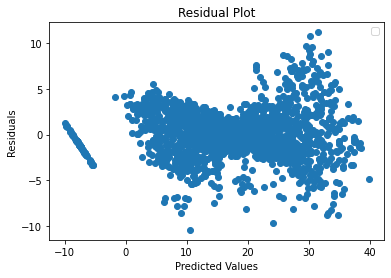

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


DecisionTreeRegressor() Cross Validation score: 0.9962322269341788
DecisionTreeRegressor() R2 score: 0.9971349778925624


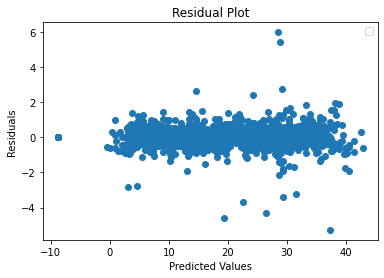

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


RandomForestRegressor() Cross Validation score: 0.9989442526661545
RandomForestRegressor() R2 score: 0.999420415928437


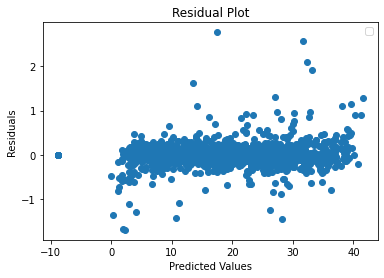

In [150]:
for i in models:
    precit_fun(i,x_test)

Note: From the graph we can see that residuals are randomly scattered around zero.so We can go for any of the model above.

***6b.Modeling with standisation***

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


LinearRegression() Cross Validation score: 0.9269990940327423
LinearRegression() R2 score: 0.9279831767303123


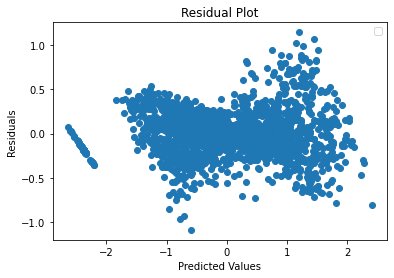

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


DecisionTreeRegressor() Cross Validation score: 0.9961655480547804
DecisionTreeRegressor() R2 score: 0.9973865444174577


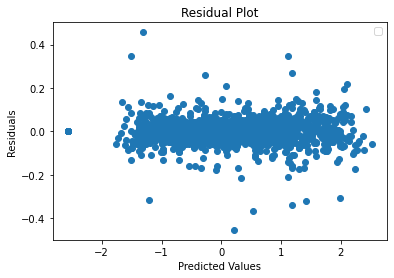

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


RandomForestRegressor() Cross Validation score: 0.9989537489878902
RandomForestRegressor() R2 score: 0.9994093740982741


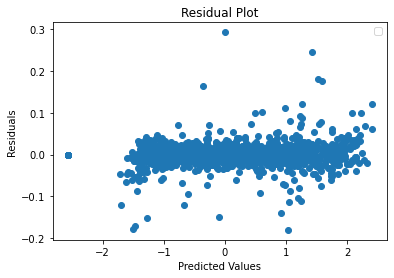

In [159]:
# scaling the data using StandardScaler
scaler = StandardScaler()

# standise the data
standard_df = scaler.fit_transform(data)

#converting the output into Dataframe
x = pd.DataFrame(standard_df, columns =data.columns)

y = x["T"]
X = x.drop("T", axis=1) 

#split the data into train & test set
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

for i in models:
    precit_fun(i,x_test)

Note: Theres is no significant change in the performance after standising the data. 
So standisation is not required for this data set.